# Pymaceuticals Inc.
---

### Analysis

- By merging the two provided datasets, we gain a more comprehensive understanding of the information, enabling a more robust analysis of the different medications administered to the unique mice in the study. After merging the data, I identified and removed duplicates to ensure the accuracy of the analysis by eliminating unnecessary information that could lead to incorrect conclusions.

With the cleaned dataset, I created a series of charts to visually explore the data. Key observations include:

Gender Distribution: The dataset consists of 50.4% male mice and 49.6% female mice, showing a balanced gender representation.
Drug Distribution: A higher number of mice were treated with Capomulin and Ramicane compared to other drugs.
Effectiveness of Capomulin: By analyzing a specific mouse treated with Capomulin, it was evident that tumor size decreased significantly over time. Furthermore, the box-and-whisker plot highlights that Capomulin and Ramicane are the most promising treatments, with lower median tumor volumes and narrower ranges of variability compared to the other drugs.
 

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [25]:
MOUSE_METADATA_PATH = "data/Mouse_metadata.csv"
STUDY_RESULTS_PATH = "data/Study_results.csv"

In [26]:
mouse_metadata = pd.read_csv(MOUSE_METADATA_PATH)
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [27]:
study_results = pd.read_csv(STUDY_RESULTS_PATH)
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [28]:
# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [29]:
# Checking the number of mice.
unique_mice_count = merged_data['Mouse ID'].nunique()
print(unique_mice_count)

249


In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint.
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data.loc[merged_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [31]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merged_data.loc[merged_data["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
duplicate_data.shape


(13, 8)

In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

means = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_table = pd.DataFrame({"Mean Tumor Volume": means,
                            "Median Tumor Volume": medians,
                            "Tumor Volume Variance": variances,
                            "Tumor Volume Std.Dev.": stds,
                            "Tumor Volume Std.Err.": sems})
stats_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean= "mean",
    median= "median",
    variance=lambda x: np.var(x, ddof=1), 
    std_dev= "std",
    sem=lambda x: x.sem())

summary



,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

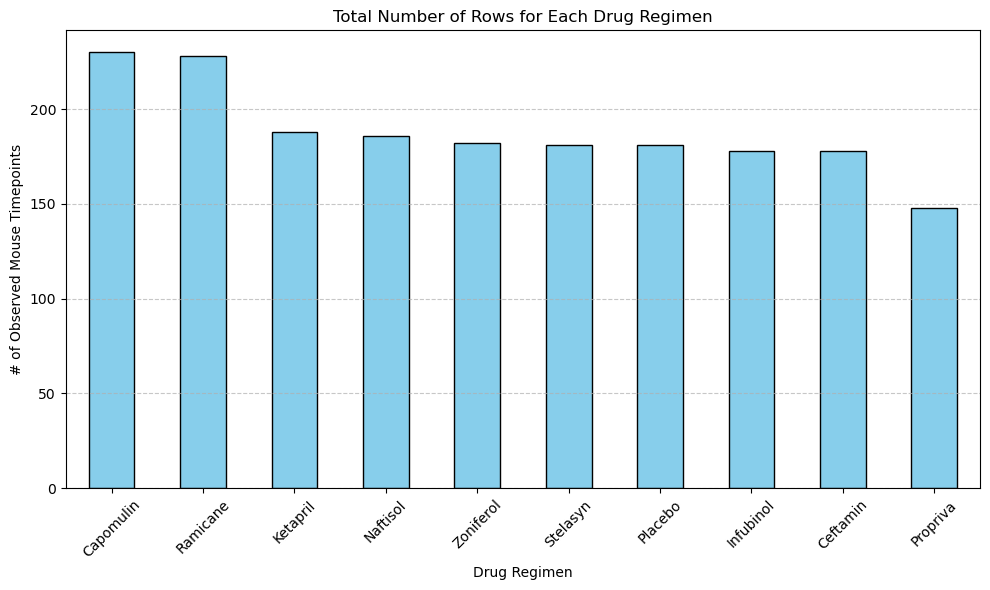

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data["Drug Regimen"].value_counts()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

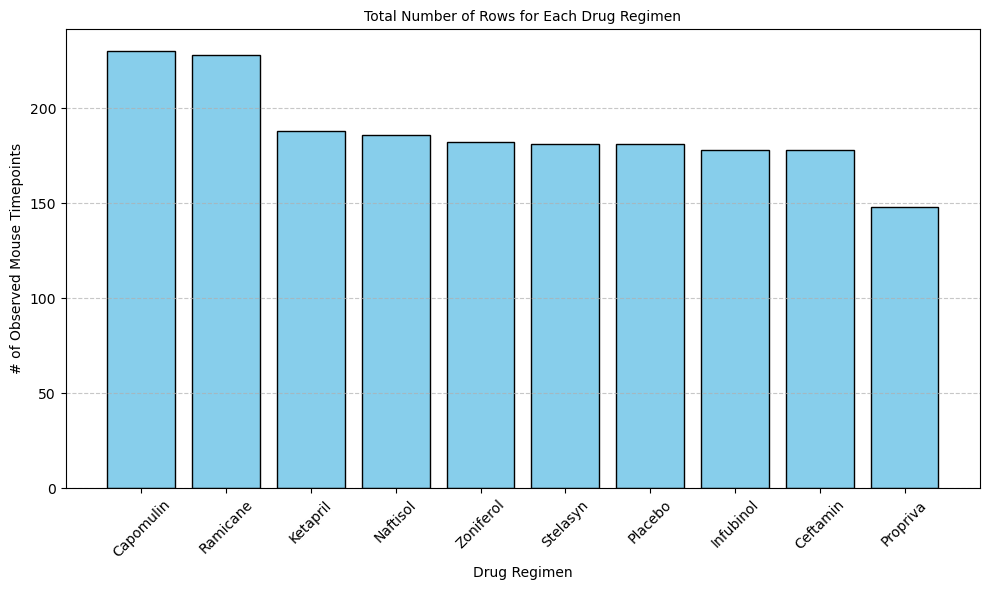

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_data["Drug Regimen"].value_counts()
drug_regimens = counts.index
row_counts = counts.values
plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, row_counts, color='skyblue', edgecolor='black')
plt.title("Total Number of Rows for Each Drug Regimen", fontsize=10)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

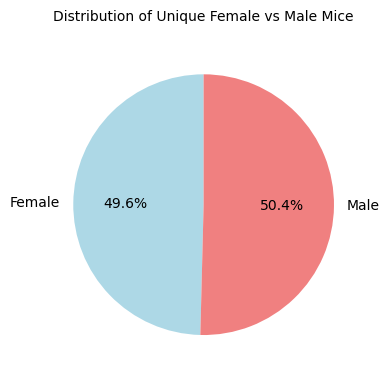

In [39]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study.
# Get the unique mice with their gender
sex_distribution = clean_data.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart
plt.figure(figsize=(4, 4))
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightcoral"], fontsize=10)
plt.title("Distribution of Unique Female vs Male Mice", fontsize=10)
plt.ylabel("")  # Removes the default y-label
plt.axis('equal')  # Ensures the pie chart is a circle
plt.tight_layout()
plt.show()

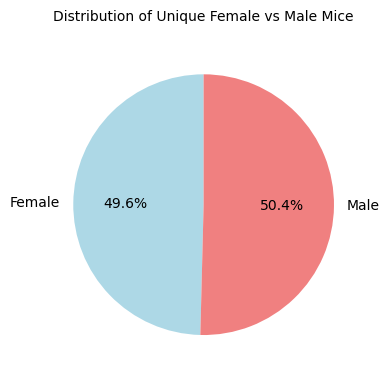

In [40]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
sex_distribution = clean_data.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart
labels = sex_distribution.index
sizes = sex_distribution.values
colors = ["lightblue", "lightcoral"]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title("Distribution of Unique Female vs Male Mice", fontsize=10)
plt.axis('equal')  
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
timepoint = filtered_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(timepoint, filtered_df, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_df[merged_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volumes.append(treatment_data)
    quartiles = treatment_data.quantile([0.25, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # add subset
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} Potential Outliers:", outliers)
    

Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/qq/qrfkk9w160926bggf7wq3ws80000gn/T/ipykernel_3069/3367933750.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt. boxplot(tumor_volumes, labels = treatments, flierprops= outlier_mark)


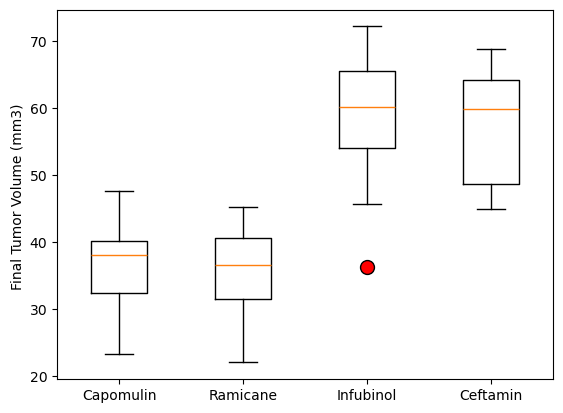

In [43]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
outlier_mark = dict(markerfacecolor = "red", markersize = 10)
plt. boxplot(tumor_volumes, labels = treatments, flierprops= outlier_mark)
plt.ylabel ("Final Tumor Volume (mm3) ")
plt. show()

## Line and Scatter Plots

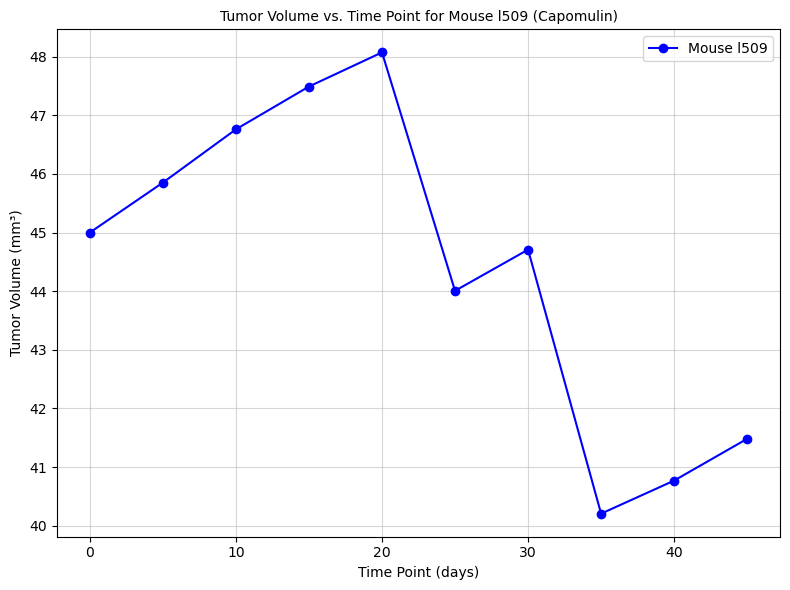

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509" 
mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & (clean_data["Drug Regimen"] == "Capomulin")]
plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='blue', label=f"Mouse {mouse_id}")
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)", fontsize=10)
plt.xlabel("Time Point (days)", fontsize=10)
plt.ylabel("Tumor Volume (mm³)", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

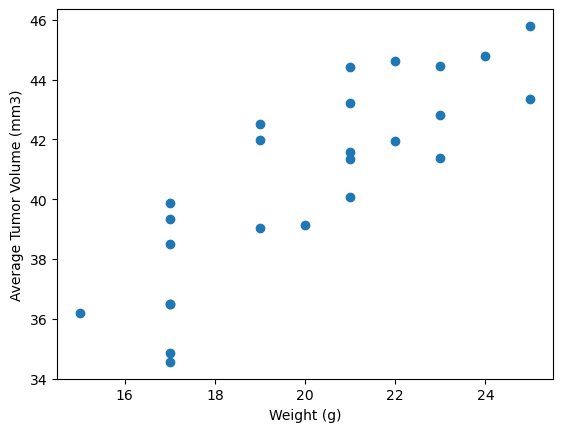

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_data.groupby (["Mouse ID"])[[ "Weight (g)","Tumor Volume (mm3)"]].mean()
plt. scatter (capomulin_average['Weight (g)'], capomulin_average["Tumor Volume (mm3)"])
plt. xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


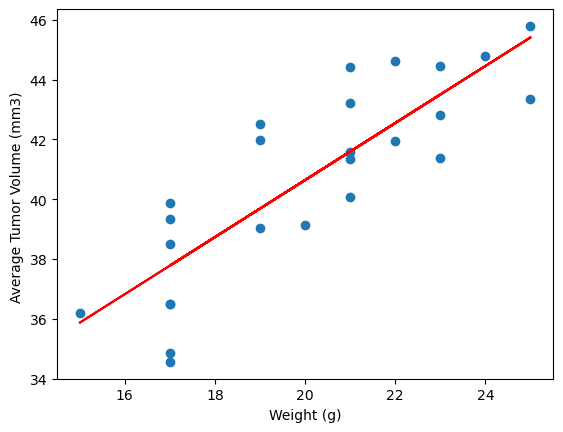

In [46]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average[ "Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st. linregress (capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
linear_plot = capomulin_average["Weight (g)"]*model[0]+model[1]
plt. scatter (capomulin_average["Weight (g)"], capomulin_average ["Tumor Volume (mm3)"])
plt. plot (capomulin_average["Weight (g)"], linear_plot, color = "red")
plt. xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3) ")
plt. show()